<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Qiskit_based_electronic_bandstructure_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This notebook shows a few examples to use [JARVIS-Tools](https://github.com/usnistgov/jarvis), [AtomQC](https://github.com/usnistgov/atomqc) and [Qiskit](https://qiskit.org/) packages to generate electronic bandstructure for [Aluminum](https://www.ctcms.nist.gov/~knc6/static/JARVIS-DFT/JVASP-816.xml). 
#For details see: https://iopscience.iop.org/article/10.1088/1361-648X/ac1154/meta

Note: We are pinning versions of some of the packages as qiskit might have renamed/modified its modules

In [1]:
!pip  install jarvis-tools==2021.7.10 qiskit-terra==0.18.0 qiskit-aer==0.8.2 numpy==1.19.5 matplotlib==3.2.2 requests==2.23.0 scipy==1.4.1 joblib==1.0.1 tqdm==4.41.1 toolz==0.11.1 xmltodict==0.12.0 qiskit-terra==0.18.0 qiskit-aer==0.8.2 qiskit-ibmq-provider==0.15.0 qiskit-ignis==0.6.0 qiskit-aqua==0.9.4


     |████████████████████████████████| 937 kB 5.9 MB/s 
     |████████████████████████████████| 6.1 MB 14.6 MB/s 
     |████████████████████████████████| 18.0 MB 643 kB/s 
     |████████████████████████████████| 14.8 MB 40.7 MB/s 
     |████████████████████████████████| 303 kB 57.4 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 234 kB 53.1 MB/s 
     |████████████████████████████████| 207 kB 68.0 MB/s 
     |████████████████████████████████| 2.1 MB 50.4 MB/s 
     |████████████████████████████████| 292 kB 49.3 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 1.6 MB 42.6 MB/s 
     |████████████████████████████████| 37.5 MB 388 kB/s 
     |████████████████████████████████| 943 kB 52.6 MB/s 
     |████████████████████████████████| 211 kB 58.1 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████

In [2]:
from jarvis.db.figshare import get_wann_electron, get_wann_phonon, get_hk_tb
from jarvis.io.qiskit.inputs import HermitianSolver
from jarvis.core.circuits import QuantumCircuitLibrary
from qiskit import Aer

backend = Aer.get_backend("statevector_simulator")
# Aluminum JARVIS-ID: JVASP-816
wtbh, Ef, atoms = get_wann_electron("JVASP-816")
kpt = [0.5, 0., 0.5] # X-point
hk = get_hk_tb(w=wtbh, k=kpt)
HS = HermitianSolver(hk)
n_qubits = HS.n_qubits()
circ = QuantumCircuitLibrary(n_qubits=n_qubits, reps=1).circuit6()
en, vqe_result, vqe = HS.run_vqe(var_form=circ, backend=backend)
vals,vecs = HS.run_numpy()
# Ef: Fermi-level
print('Classical, VQE (eV):', vals[0]-Ef, en-Ef)
print('Show model\n', circ)

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


Obtaining raw io files 145k...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 6.00M/6.00M [00:00<00:00, 6.68MiB/s]


Loading the zipfile...
Loading completed.
H size 15 13 15 8 8


/usr/local/lib/python3.7/dist-packages/qiskit/aqua/operators/legacy/op_converter.py:90: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  num_processes=aqua_globals.num_processes)
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/components/optimizers/optimizer.py:50: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit.algorithms.optimizers', 'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/vq_algorithm.py:72: DeprecationWarning: The class qiskit.aqua.algorithms.VQAlgorithm is deprecated. It was moved/refactored to qiskit.algori

Classical, VQE (eV): -3.0437167852849907 -2.8066640987340845
Show model
      ┌──────────┐┌──────────┐          ┌──────────┐┌──────────┐             
q_0: ┤ Ry(θ[0]) ├┤ Rz(θ[3]) ├──■────■──┤ Ry(θ[6]) ├┤ Rz(θ[9]) ├─────────────
     ├──────────┤├──────────┤┌─┴─┐  │  └──────────┘├──────────┤┌───────────┐
q_1: ┤ Ry(θ[1]) ├┤ Rz(θ[4]) ├┤ X ├──┼───────■──────┤ Ry(θ[7]) ├┤ Rz(θ[10]) ├
     ├──────────┤├──────────┤└───┘┌─┴─┐   ┌─┴─┐    ├──────────┤├───────────┤
q_2: ┤ Ry(θ[2]) ├┤ Rz(θ[5]) ├─────┤ X ├───┤ X ├────┤ Ry(θ[8]) ├┤ Rz(θ[11]) ├
     └──────────┘└──────────┘     └───┘   └───┘    └──────────┘└───────────┘


In [3]:
from jarvis.io.qiskit.inputs import get_bandstruct


# It's going to be very crude bandstructure, just for learning purposes
# Increase line_density (such as 10) and number of reps (such as 5) in qircuit model to get better quality plot

kpts 24
kp= 0 [0.0, 0.0, 0.0]
np_vals [-3.24066445 -3.16463202 21.64459304 21.66631242 21.68275108 21.7124318
 21.73906807 21.75494905]
vqe_vals [-3.24066409 -3.16462936 21.64459341 21.67045639 21.68748935 21.71228619
 21.72827656 21.75357244]
kp= 1 [0.25, 1.7967564939297314e-17, 0.25]
np_vals [-0.99045319 -0.91496282 16.11225158 16.12899456 16.16829145 16.18771485
 16.87352861 16.95579697]
vqe_vals [-0.99045174 -0.91496113 16.11681448 16.13334674 16.16136749 16.18610803
 16.8724919  16.95514269]
kp= 2 [0.5, 3.593512987859463e-17, 0.5]
np_vals [ 4.88519509  4.95713807  6.16090983  6.24112862 13.26135091 13.27946273
 13.33681169 13.35498806]
vqe_vals [ 4.8852107   4.95714019  6.16091082  6.24116806 13.26131919 13.27918294
 13.32860768 13.3549753 ]
kp= 3 [0.5, 3.593512987859463e-17, 0.5]
np_vals [ 4.88519509  4.95713807  6.16090983  6.24112862 13.26135091 13.27946273
 13.33681169 13.35498806]
vqe_vals [ 4.88520532  4.95714207  6.16092547  6.24122222 13.26121015 13.2791367
 13.32286641 13

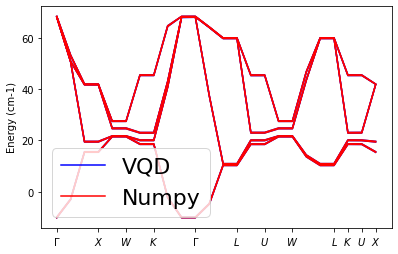

{'ef': 0,
 'eigvals_np': [[-10.175686370472006,
   -9.93694454887238,
   67.96402214431467,
   68.0322210077017,
   68.08383840027639,
   68.17703586217682,
   68.26067374533606,
   68.31054001953846],
  [-3.1100230273741225,
   -2.872983261326951,
   50.592469945859705,
   50.64504292986907,
   50.76843514202976,
   50.82942462611685,
   52.98287984025771,
   53.24120248456805],
  [15.339512597405136,
   15.565413544441743,
   19.345256864373383,
   19.59714385862123,
   41.64064184898809,
   41.69751297638366,
   41.87758870651629,
   41.934662503270474],
  [15.339512597405136,
   15.565413544441743,
   19.345256864373383,
   19.59714385862123,
   41.64064184898809,
   41.69751297638366,
   41.87758870651629,
   41.934662503270474],
  [21.3840333908542,
   21.519911297824585,
   21.608868090806485,
   21.745684793149977,
   24.520054335879543,
   24.80465901709904,
   27.382108258692007,
   27.585502315694203],
  [21.3840333908542,
   21.519911297824585,
   21.608868090806485,
   21.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
get_bandstruct(w=wtbh,atoms=atoms, line_density=1, savefig=False)
# Scroll down to see th plot

In [5]:
!pip freeze

absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.10
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.5.2
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cryptography==36.0.1
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.28
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill